In [172]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [173]:
#loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [174]:
#checking the shape of data
x_train.shape

(60000, 28, 28)

In [175]:
#scaling from (0,255) to (0,1)
x_train = x_train / 255.0
x_test = x_test / 255.0

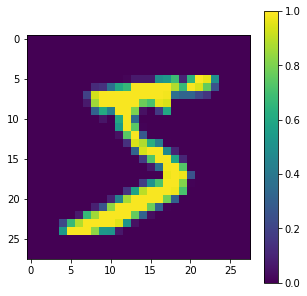

Digit is  5


In [176]:
#sample picture of one digit
plt.figure(figsize = (5,5))
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
print("Digit is ",y_train[0])

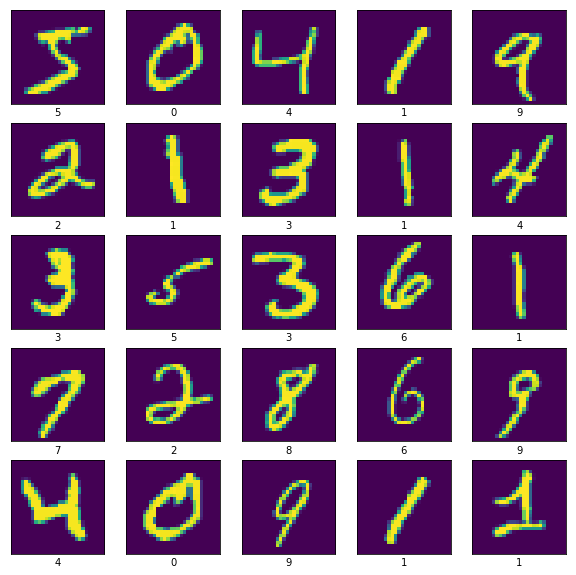

In [177]:
#examples of digits
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [178]:
#initializing the model
model = Sequential()

#adding the hidden layer
#using relu as activation function
model.add(Dense(512, input_dim=784, activation='relu'))

#adding output layer
model.add(Dense(10, activation='softmax'))

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [180]:
#Reshaping of data
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [181]:
#checking shape after reshaping
x_train.shape

(60000, 784)

In [182]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [183]:
print(y_train[0])
print(y_train[0].shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10,)


In [184]:
#compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [185]:
#fitting the model 
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.1997 - acc: 0.9412
Epoch 2/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0797 - acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0531 - acc: 0.9834
Epoch 4/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0368 - acc: 0.9877
Epoch 5/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0265 - acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0209 - acc: 0.9935
Epoch 7/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0184 - acc: 0.9938
Epoch 8/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0141 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0117 - acc: 0.9962
Epoch 10/10
60000/60000 [==============================] - 13s 215us/step - loss: 

In [186]:
#Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss is = ", loss)
print('Test accuracy is = %0.2f' % accuracy)

10000/10000 [==============================] - 0s 28us/step
Loss is =  0.09107388561827574
Test accuracy is = 0.98
